# Data Exploration Exercises

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import env
import prepare

import re
import unicodedata
import nltk

from wordcloud import WordCloud

pd.options.display.max_colwidth = None
pd.options.display.max_rows = None
pd.options.display.max_columns = None

## 1) Spam Data

## Load the spam data set.

In [2]:
url = env.get_db_url('spam_db')

spam = pd.read_sql('''
SELECT *
FROM spam
''', url)

spam = spam.drop(columns=['id'])

In [3]:
spam.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [4]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [5]:
# # Clean
# spam.text = [prepare.basic_clean(text) for text in spam.text]
# spam.text = [prepare.tokenize(text) for text in spam.text]
# spam.text = [prepare.lemmatize(text) for text in spam.text]
# spam.text = [prepare.remove_stopwords(text) for text in spam.text]

# ham_words = ' '.join(spam[spam.label == 'ham'].text)
# spam_words = ' '.join(spam[spam.label == 'spam'].text)
# all_words = ' '.join(spam.text)

In [6]:
ham_words = clean(' '.join(spam[spam.label == 'ham'].text))
spam_words = clean(' '.join(spam[spam.label == 'spam'].text))
all_words = clean(' '.join(spam.text))

## Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

### By Row

In [7]:
spam['bigram'] = [list(nltk.bigrams(text.split())) for text in spam.text]

In [12]:
spam.head()

,label,text,bigram
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...","[(Go, until), (until, jurong), (jurong, point,), (point,, crazy..), (crazy.., Available), (Available, only), (only, in), (in, bugis), (bugis, n), (n, great), (great, world), (world, la), (la, e), (e, buffet...), (buffet..., Cine), (Cine, there), (there, got), (got, amore), (amore, wat...)]"
1,ham,Ok lar... Joking wif u oni...,"[(Ok, lar...), (lar..., Joking), (Joking, wif), (wif, u), (u, oni...)]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,"[(Free, entry), (entry, in), (in, 2), (2, a), (a, wkly), (wkly, comp), (comp, to), (to, win), (win, FA), (FA, Cup), (Cup, final), (final, tkts), (tkts, 21st), (21st, May), (May, 2005.), (2005., Text), (Text, FA), (FA, to), (to, 87121), (87121, to), (to, receive), (receive, entry), (entry, question(std), (question(std, txt), (txt, rate)T&C's), (rate)T&C's, apply), (apply, 08452810075over18's)]"
3,ham,U dun say so early hor... U c already then say...,"[(U, dun), (dun, say), (say, so), (so, early), (early, hor...), (hor..., U), (U, c), (c, already), (already, then), (then, say...)]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[(Nah, I), (I, don't), (don't, think), (think, he), (he, goes), (goes, to), (to, usf,), (usf,, he), (he, lives), (lives, around), (around, here), (here, though)]"


In [19]:
from wordcloud import WordCloud
text_one = spam.text[0]
text_one

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

(-0.5, 799.5, 599.5, -0.5)

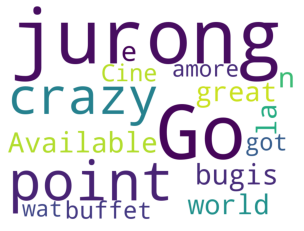

In [41]:
img = WordCloud(background_color='white',width=800, height=600).generate(text_one)
plt.imshow(img)
plt.axis('off')

In [36]:
bigrams_one = (pd.Series(nltk.bigrams(text_one.split()))
                       .value_counts())
bigrams_one

(Go, until)             1
(great, world)          1
(got, amore)            1
(there, got)            1
(Cine, there)           1
(buffet..., Cine)       1
(e, buffet...)          1
(la, e)                 1
(world, la)             1
(n, great)              1
(until, jurong)         1
(bugis, n)              1
(in, bugis)             1
(only, in)              1
(Available, only)       1
(crazy.., Available)    1
(point,, crazy..)       1
(jurong, point,)        1
(amore, wat...)         1
dtype: int64

In [38]:
data = {k[0] + ' ' + k[1]: v for k, v in bigrams_one.to_dict().items()}

(-0.5, 799.5, 599.5, -0.5)

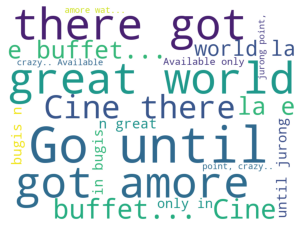

In [39]:
img = WordCloud(background_color='white',width=800, height=600).generate_from_frequencies(data)
plt.imshow(img)
plt.axis('off')

### By Type

#### Ham

In [57]:
top_ham = pd.Series(nltk.bigrams(ham_words)).value_counts().head(20)
top_ham

(call, later)      52
(ill, call)        48
(let, know)        42
(sorry, ill)       39
(dont, know)       32
(good, morning)    31
(new, year)        30
(take, care)       26
(im, going)        24
(ok, lor)          22
(pls, send)        22
(im, gonna)        20
(good, night)      19
(happy, new)       19
(wat, time)        18
(last, night)      18
(hi, hi)           18
(great, day)       17
(dont, want)       15
(want, go)         15
dtype: int64

In [52]:
ham_data = {k[0] + ' ' + k[1]: v for k, v in top_ham.to_dict().items()}

img = WordCloud(background_color='white',width=800, height=600).generate_from_frequencies(ham_data)

plt.imshow(img)
plt.axis('off')

#### Spam

In [58]:
top_spam = pd.Series(nltk.bigrams(spam_words)).value_counts().head(20)
top_spam

(please, call)          44
(customer, service)     27
(po, box)               24
(a1000, cash)           23
(guaranteed, call)      23
(prize, guaranteed)     22
(send, stop)            19
(selected, receive)     19
(await, collection)     19
(every, week)           19
(chance, win)           19
(urgent, mobile)        18
(land, line)            18
(valid, 12hrs)          17
(claim, call)           17
(sae, tc)               16
(account, statement)    16
(call, 08000930705)     16
(prize, claim)          16
(ur, mob)               15
dtype: int64

In [54]:
spam_data = {k[0] + ' ' + k[1]: v for k, v in top_spam.to_dict().items()}

img = WordCloud(background_color='white',width=800, height=600).generate_from_frequencies(spam_data)

plt.imshow(img)
plt.axis('off')

#### All

In [59]:
top_all = pd.Series(nltk.bigrams(all_words)).value_counts().head(20)
top_all

(please, call)         53
(call, later)          52
(ill, call)            48
(let, know)            42
(sorry, ill)           39
(dont, know)           38
(new, year)            32
(good, morning)        31
(customer, service)    29
(take, care)           26
(po, box)              25
(im, going)            24
(a1000, cash)          23
(guaranteed, call)     23
(ok, lor)              22
(pls, send)            22
(prize, guaranteed)    22
(every, week)          21
(send, stop)           20
(4, ur)                20
dtype: int64

In [56]:
all_data = {k[0] + ' ' + k[1]: v for k, v in top_all.to_dict().items()}

img = WordCloud(background_color='white',width=800, height=600).generate_from_frequencies(all_data)

plt.imshow(img)
plt.axis('off')

#### Is there any overlap in the bigrams for the spam data and the ham data?

#### Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

##### Ham

In [61]:
top_ham_tri = pd.Series(nltk.ngrams(ham_words, 3)).value_counts().head(20)
top_ham_tri

(ill, call, later)          42
(sorry, ill, call)          38
(happy, new, year)          19
(pls, send, message)        13
(cant, pick, phone)         12
(right, pls, send)          12
(phone, right, pls)         12
(pick, phone, right)        12
(hi, hi, hi)                11
(x, x, x)                    8
(good, morning, dear)        7
(call, later, meeting)       6
(convey, birthday, wish)     6
(pls, convey, birthday)      6
(kiss, across, sea)          6
(lunch, lunch, invited)      5
(man, last, week)            5
(story, man, last)           5
(sad, story, man)            5
(love, go, day)              5
dtype: int64

(-0.5, 799.5, 599.5, -0.5)

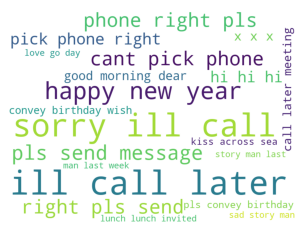

In [63]:
ham_data_tri = {k[0] + ' ' + k[1]+ ' ' + k[2]: v for k, v in top_ham_tri.to_dict().items()}

img = WordCloud(background_color='white',width=800, height=600).generate_from_frequencies(ham_data_tri)

plt.imshow(img)
plt.axis('off')

##### Spam

In [70]:
top_spam_tri = pd.Series(nltk.ngrams(spam_words,3)).value_counts().head(20)
top_spam_tri

(prize, guaranteed, call)              21
(call, customer, service)              15
(land, line, claim)                    14
(reply, call, 08000930705)             14
(private, 2003, account)               13
(2003, account, statement)             13
(camcorder, reply, call)               12
(guaranteed, a1000, cash)              12
(show, 800, unredeemed)                12
(urgent, trying, contact)              11
(tone, 4, ur)                          11
(anytime, network, min)                11
(please, call, customer)               11
(every, week, txt)                     11
(bonus, caller, prize)                 11
(speak, live, operator)                10
(customer, service, representative)    10
(a2000, bonus, caller)                 10
(cash, await, collection)              10
(mob, every, week)                      9
dtype: int64

(-0.5, 799.5, 599.5, -0.5)

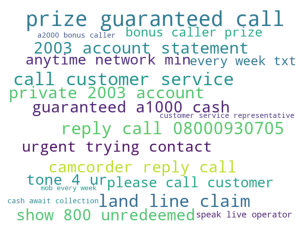

In [71]:
spam_data_tri = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_spam_tri.to_dict().items()}

img = WordCloud(background_color='white',width=800, height=600).generate_from_frequencies(spam_data_tri)

plt.imshow(img)
plt.axis('off')

## 2) Explore the blog articles using the techniques discussed in the exploration lesson.

## 3) Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.